# Обучаем нейронную сеть

Основные понятия машинного обучения:

**Модель** - алгоритм машинного обучения, который мы используем.

**Данные** - то, что используется для обучения. Как правило - пары (вопрос, ответ).

Данные делятся на:

*   Исходные и целевые
*   Обучающие и тестовые



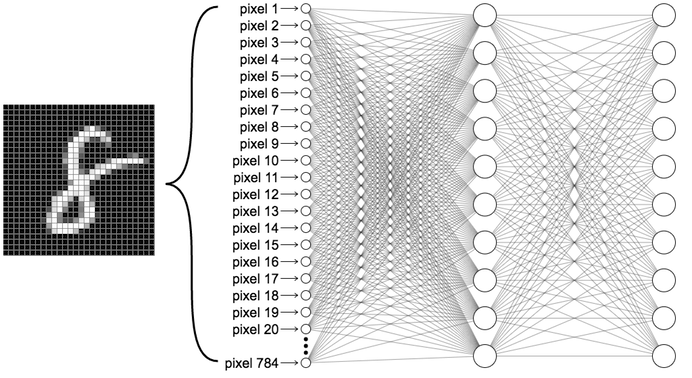

В этом ноутбуке мы будем работать с моделью машинного обучения (нейросетью) как с черным ящиком, то есть мы не рассматриваем как она устроена внутри.

Как мы работаем с моделью:
*   Подготавливаем данные для обучения: массив изображений **в формате uint8** размером **(N, 28, 28)** и массив ответов размером **(N,)**. **N** - количество изображений, чем оно больше, тем лучше обучится модель.
*   Передаем данные в функцию train_model. Эта функция обучает модель на переданных данных и возаращает модель в виде объекта. Функция train_model не детерминированна, то есть полученная модель каждый раз будет немного разной.
*   Вызывам для модели метод .predict(), в который передаем массив изображений размером **(M, 28, 28)**, этот метод возвращает массив ответов размером **(M, 10)** - по 10 чисел для каждого входного изображения. Каждое число означает вероятность того, что на изображении нарисована соответствующая цифра.

In [ ]:
import keras
from keras.layers import *
  
def train_model(X, y):
  model = keras.Sequential([Lambda(lambda x: x/255), Flatten(), Dense(200, 'relu'), Dropout(0.3), Dense(10, 'softmax')])
  model.compile('adam', keras.losses.SparseCategoricalCrossentropy())
  callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(f'epoch {epoch+1}/5'))
  model.fit(X, y, batch_size=128, epochs=5, callbacks=callback, verbose=0)
  return model

Подготавливаем данные:

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28) uint8
y_train: (60000,) uint8
X_test: (10000, 28, 28) uint8
y_test: (10000,) uint8


Обучаем нейронную сеть:

In [ ]:
model = train_model(X_train, y_train)

epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5


Делаем предсказания на тестовых данных:

In [ ]:
predictions = model.predict(X_test)

print('predictions:', predictions.shape, predictions.dtype)

predictions: (10000, 10) float32


Что произошло?

*   Мы имели 50000 обучающих изображений с ответами и на этих данных обучили нейронную сеть.
*   Мы имели 10000 тестовых изображений, для которых нейронная сеть предсказала ответы.

Посмотрим на первое тестовое изображение:

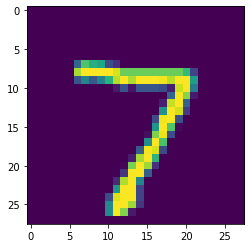

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

Какие ответы выдала для него нейросеть?

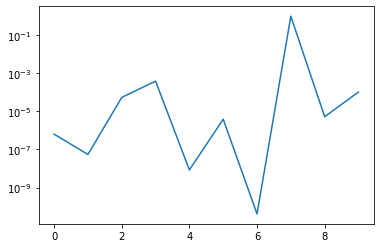

In [ ]:
plt.gca().set_yscale('log')
plt.plot(predictions[0]);

```
0-e число означает вероятность того, что на изображении нарисована цифра 0.
1-e число означает вероятность того, что на изображении нарисована цифра 1.
...
9-e число означает вероятность того, что на изображении нарисована цифра 9.
```

Максимальную вероятность нейросеть выдала для семерки, что и является правильным ответом.

Давайте посмотрим сразу на первые 100 предсказаний:

In [ ]:
predictions.shape

(10000, 10)

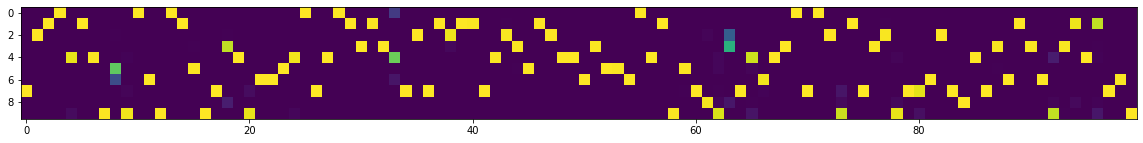

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(predictions[:100].T);

# Редуцирующие операции в numpy

Как для каждой картинки получить не набор вероятностей, а окончательный ответ?

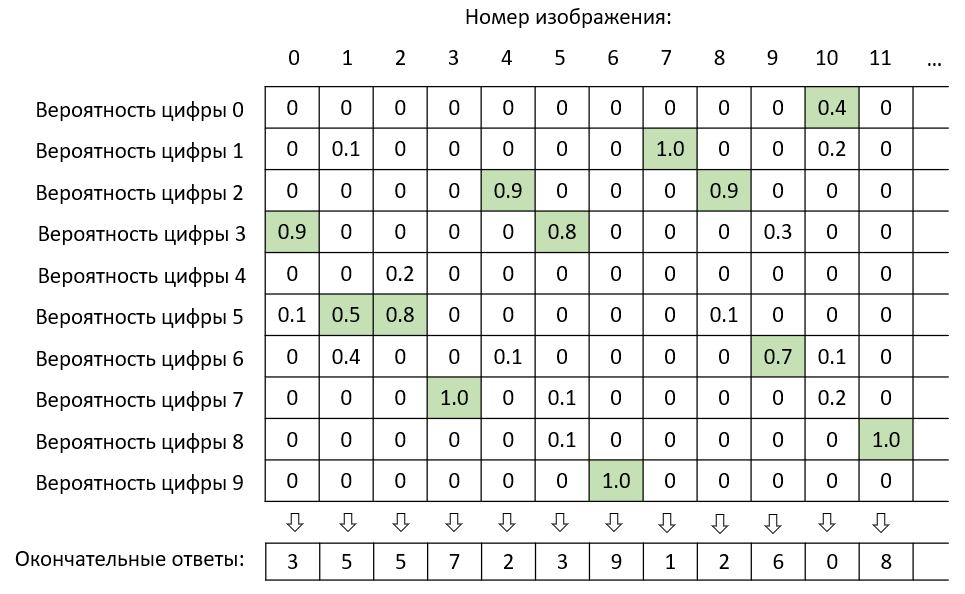

**Редуцириющие операции** (сумма, среднее, поиск минимума, максимума и др.) всегда **осуществляются по одной оси или набору осей**. Выбранная ось (оси) "схлопываются", то есть "поглощаются" операцией. 

**Пример:** если в массиве **array** размером **(32, 64, 10, 8, 1)** считаем сумму по осям 1 и 2, то результат будет иметь форму **(32, 8, 1)**: первая и вторая ось не попадают в результат.

`array.sum(axis=(1, 2))`

**Пример:** если массив изображений **X** имеет форму (50000, 32, 32, 3), то операция усреднения по 3-ей оси сделает изображение черно-белым, результат будет иметь форму (50000, 32, 32).

```
X.mean(axis=3)
X.mean(axis=-1) #то же самое
```

**Пример:** пусть массив **array** имеет размер (100, 100, 100). Чтобы найти сумму всего многомерного массива, нужно выполнить операцию сумму по всем осям. Тогда в качестве ответа мы получим одно число. Чтобы выполнить сумму (среднее и т. д.) по всем осям сразу, нужно не указывать параметр axis.

`array.sum()`

Основые редуцирующие операции:
*   **sum**: сумма
*   **mean**: арифметическое среднее
*   **max**: поиск максимального значения
*   **min**: поиск минимального значения
*   **argmin**: поиск индекса минимального значения (может выполняться только по одной оси!)
*   **argmax**: поиск индекса максимального значения (может выполняться только по одной оси!)

Чтобы преобразовать предсказания нейросети в окончательный ответ нужно выполнить операцию argmax по последней оси:

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
answers = predictions.argmax(axis=1)
print(answers.shape)
print(answers[:10])

(10000,)
[7 2 1 0 4 1 4 9 6 9]


In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

Таким образом мы получили окончательные ответы.

У нас есть ответы к тестовым изображениям (переменная y_test), поэтому можем посчитать точность предсказаний:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(answers, y_test)

0.977

Один из способов повышения точности - усреднение предсказаний сразу нескольких моделей. Обучим 5 нейронных сетей:

In [ ]:
models = [train_model(X_train, y_train) for i in range(5)]

epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5
epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5
epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5
epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5
epoch 1/5
epoch 2/5
epoch 3/5
epoch 4/5
epoch 5/5


Получим предсказания каждой нейросети для тестовых данных.

In [ ]:
predictions = [model.predict(X_test) for model in models]

**predictions** - это список (list) из 5 numpy-массивов, каждый из которых имеет форму **(10000, 10)**.

In [ ]:
print(predictions[0].shape)

print([accuracy_score(p.argmax(axis=1), y_test) for p in predictions])

(10000, 10)
[0.9741, 0.9757, 0.9767, 0.9755, 0.9764]


Соединим все предсказания в один массив. Для этого выполним **`np.stack`**, добавив новую ось в начало.

В результате получим массив вероятностей формой **(5, 10000, 10)**.

*   Нулевая ось - номер модели
*   Первая ось - номер изображения
*   Вторая ось - номер цифры

In [ ]:
import numpy as np
predictions = np.stack(predictions, axis=0)
predictions.shape

(5, 10000, 10)

Таким образом, для каждого изображения имеем массив (5, 10). Как получить окончательный ответ?

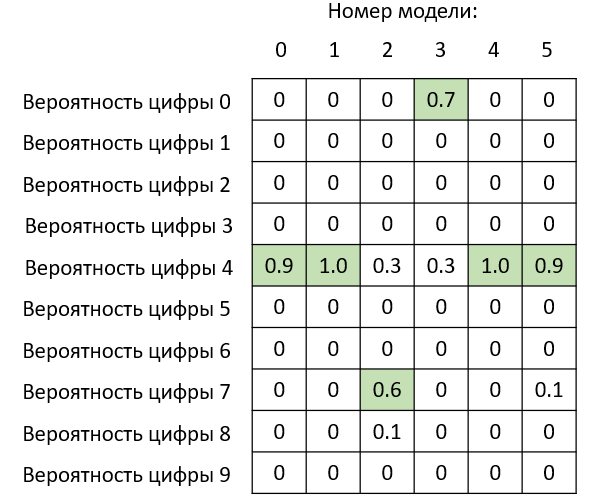

**Вариант 1**: усреднить по номеру модели, затем взять argmax по номер цифры.

**Вариант 2**: взять argmax по номер цифры, затем в качестве ответа взять самую часто встречающуюся цифру.

Попробуем вариант 1:

In [ ]:
print(predictions.shape)

(5, 10000, 10)


In [ ]:
answers = predictions.mean(axis=0).argmax(axis=1) #почему не axis=2?

accuracy_score(answers, y_test)

0.9776

Теперь вариант 2:

In [ ]:
tmp = predictions.argmax(axis=2)
print(tmp.shape)

#как найти самое часто встречающееся значение?
#для этого есть специальная функция в библиотеке scipy
import scipy
answers = scipy.stats.mode(tmp, axis=0).mode[0]

accuracy_score(answers, y_test)

(5, 10000)


0.9771

# Bincount

**np.bincount** - полезная функция, с помощью которых можно посчитать частоту встречаемости целых чисел в одмерном массиве.

In [ ]:
np.bincount([1, 1, 7, 6, 8, 6])

array([0, 2, 0, 0, 0, 0, 2, 1, 1])

**np.bincount** возвращает одномерный массив, i-й элемент которого равен количеству вхождений числа i в исходный массив.

In [ ]:
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

Видим, что в тестовом наборе данных:

*   890 нулей
*   1135 единиц
*   1032 двойки
*   ... и так далее

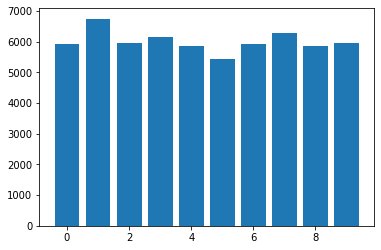

In [ ]:
plt.bar(range(10), np.bincount(y_train));

# Логические операции в numpy

что будет если два массива сравнить?

In [ ]:
np.random.rand(10, 10) > np.random.rand(10, 10)

array([[False, False, False,  True, False,  True,  True, False, False,
        False],
       [ True, False,  True, False,  True,  True, False,  True,  True,
        False],
       [ True, False, False,  True, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False,  True, False, False, False, False,  True,  True,
        False],
       [False,  True, False,  True,  True, False, False, False, False,
        False],
       [ True,  True,  True, False,  True, False, False, False,  True,
         True],
       [ True,  True, False, False, False,  True, False, False, False,
         True],
       [ True, False,  True,  True,  True,  True,  True, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
         True]])

Как правило сравнивают либо два массива одинакового размера, либо массив с числом. Результатом является массив типа bool (True/False) такого же размера, как исходный массив. То есть:

*   Массивы одинакового размера сравниваются друг с другом попарно
*   При сравнении массива с числом каждый элемент массива сравнивается с этим числом

In [ ]:
array = np.arange(8)
array

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
array > 4

array([False, False, False, False, False,  True,  True,  True])

Как помним из предыдущего раздела, такой массив логических значений можно подставить в качестве индекса:

In [ ]:
array[array > 4]

array([5, 6, 7])

Например таким способом мы можем получить все тестовые изображения, на которые дан неправильный ответ:

In [ ]:
indices = (answers != y_test)
X_hard = X_test[indices]
y_hard = y_test[indices]
print(len(X_hard))

229


Нарисуем первые 10 изображений из этого массива:

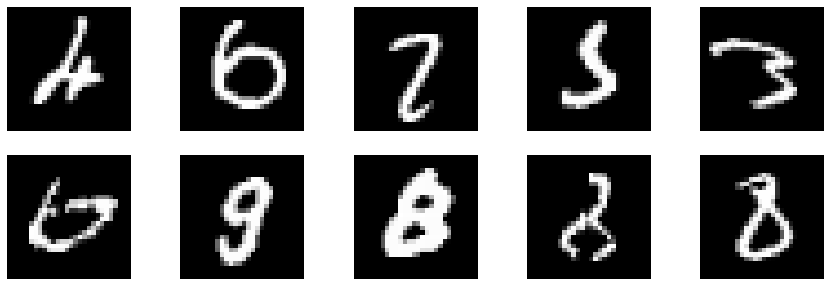

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (15, 5))
for i in range(10):
  img = X_hard[i]
  ax = axes.flat[i]
  ax.imshow(img, cmap='gray')
  ax.axis('off')